In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

In [ ]:
dataset_path = '/content/drive/MyDrive/dl miniproject/16000_pcm_speeches'
speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

In [ ]:
def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

In [ ]:
X, y = extract_features(dataset_path, speaker_folders)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
bilstm_model = models.Sequential([
    layers.Bidirectional(layers.LSTM(128), input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(speaker_folders), activation='softmax')
])

In [ ]:
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
bilstm_history = bilstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
165/165 [==============================] - 34s 180ms/step - loss: 0.3590 - accuracy: 0.8908 - val_loss: 0.0540 - val_accuracy: 0.9849
Epoch 2/20
165/165 [==============================] - 20s 122ms/step - loss: 0.0268 - accuracy: 0.9949 - val_loss: 0.0267 - val_accuracy: 0.9956
Epoch 3/20
165/165 [==============================] - 16s 96ms/step - loss: 0.0098 - accuracy: 0.9983 - val_loss: 0.0331 - val_accuracy: 0.9885
Epoch 4/20
165/165 [==============================] - 16s 95ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0174 - val_accuracy: 0.9956
Epoch 5/20
165/165 [==============================] - 16s 96ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0119 - val_accuracy: 0.9947
Epoch 6/20
165/165 [==============================] - 15s 92ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9973
Epoch 7/20
165/165 [==============================] - 16s 95ms/step - loss: 5.1037e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_acc

In [ ]:
bilstm_y_pred_probabilities = bilstm_model.predict(X_test)
bilstm_y_pred = np.argmax(bilstm_y_pred_probabilities, axis=1)
bilstm_accuracy = accuracy_score(y_test, bilstm_y_pred)
bilstm_f1 = f1_score(y_test, bilstm_y_pred, average='weighted')

36/36 [==============================] - 2s 31ms/step


In [ ]:
print(f"BiLSTM Model Test Accuracy: {bilstm_accuracy}")
print(f"BiLSTM Model Weighted F1 Score: {bilstm_f1}")

BiLSTM Model Test Accuracy: 0.9982253771073647
BiLSTM Model Weighted F1 Score: 0.9982253728401108


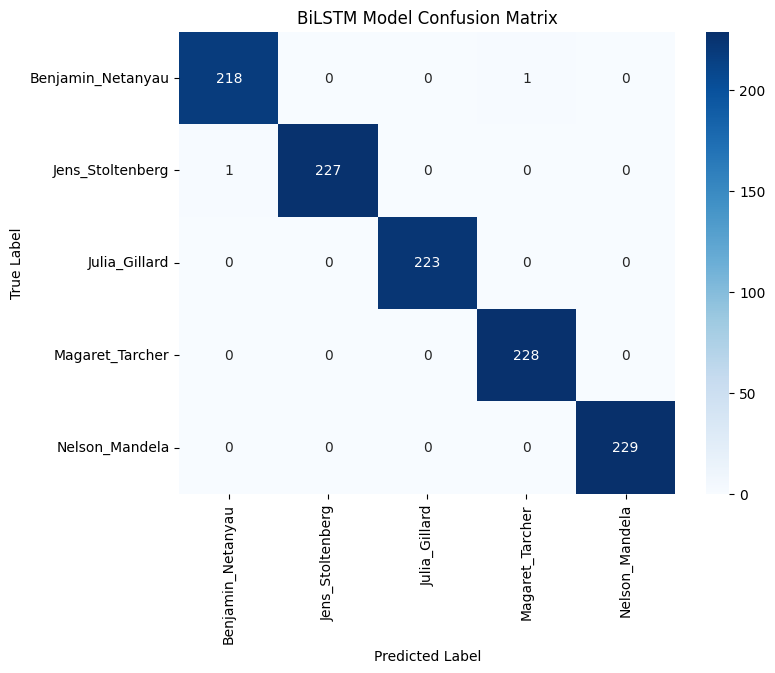

In [ ]:
bilstm_conf_matrix = confusion_matrix(y_test, bilstm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(bilstm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)
plt.title("BiLSTM Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

                   precision    recall  f1-score   support

Benjamin_Netanyau       1.00      1.00      1.00       219
 Jens_Stoltenberg       1.00      1.00      1.00       228
    Julia_Gillard       1.00      1.00      1.00       223
  Magaret_Tarcher       1.00      1.00      1.00       228
   Nelson_Mandela       1.00      1.00      1.00       229

         accuracy                           1.00      1127
        macro avg       1.00      1.00      1.00      1127
     weighted avg       1.00      1.00      1.00      1127



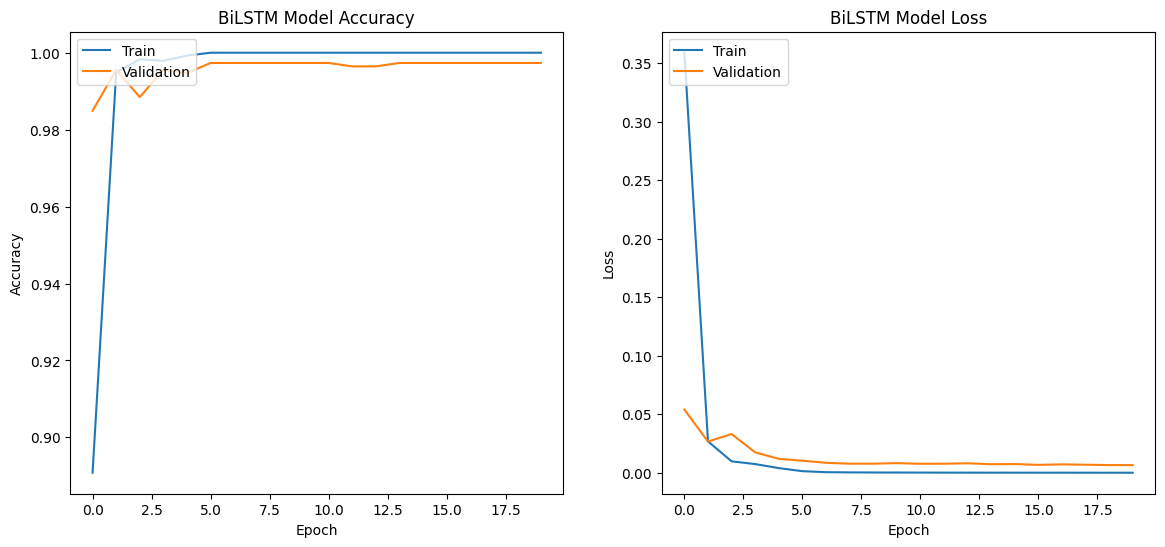

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, bilstm_y_pred, target_names=speaker_folders)
print(report)

# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(bilstm_history.history['accuracy'])
plt.plot(bilstm_history.history['val_accuracy'])
plt.title('BiLSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(bilstm_history.history['loss'])
plt.plot(bilstm_history.history['val_loss'])
plt.title('BiLSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
